In [1]:
#Import Library
import pandas as pd

In [2]:
#Load Dataset
df = pd.read_csv(r"..\data\weather_dataset.csv")

In [3]:
#Display First & Last 5 rows datapoints from dataset
print("First 5 rows - Datapoints")
print(df.head(5))
print("Last 5 rows - Datapoints")
print(df.tail(5))

First 5 rows - Datapoints
   tempmax  tempmin  temp  humidity  precip  precipprob  precipcover  \
0     36.1     28.4  32.1      75.5     1.1         100         25.0   
1     37.5     21.1  28.6      41.7     0.0           0          0.0   
2     40.1     21.9  31.7      30.7     0.0           0          0.0   
3     36.4     21.0  29.9      27.4     0.0           0          0.0   
4     37.5     21.7  30.6      23.7     0.0           0          0.0   

   windspeed  sealevelpressure  month  dayofweek  weekofyear  temp_humidity  \
0       11.3             993.2      8          1          32        2423.55   
1       17.6            1005.1      4          0          16        1192.62   
2       27.7            1001.7      4          1          16         973.19   
3       22.3            1002.5      4          2          16         819.26   
4       12.4            1003.4      4          3          16         725.22   

   temp_range  heat_index              conditions  
0         7.7 

In [4]:
#Information of dataset
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3557 entries, 0 to 3556
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           3557 non-null   float64
 1   tempmin           3557 non-null   float64
 2   temp              3557 non-null   float64
 3   humidity          3557 non-null   float64
 4   precip            3557 non-null   float64
 5   precipprob        3557 non-null   int64  
 6   precipcover       3557 non-null   float64
 7   windspeed         3557 non-null   float64
 8   sealevelpressure  3557 non-null   float64
 9   month             3557 non-null   int64  
 10  dayofweek         3557 non-null   int64  
 11  weekofyear        3557 non-null   int64  
 12  temp_humidity     3557 non-null   float64
 13  temp_range        3557 non-null   float64
 14  heat_index        3557 non-null   float64
 15  conditions        3557 non-null   object 
dtypes: float64(11), int64(4), object(1)
memory

Inference :
1. This dataset does not contain "NULL".
2. Totally 15 Features are in dataset.
3. In which 11 Features are Float, 4 Features are Integer and 1 Target Label as Object.
4. Shape : 3557 rows and 16 columns

In [5]:
#Statistical Summary
df.describe()

,tempmax,tempmin,temp,humidity,precip,precipprob,precipcover,windspeed,sealevelpressure,month,dayofweek,weekofyear,temp_humidity,temp_range,heat_index
count,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000
mean,31.367501,20.076132,25.403374,63.755440,2.459033,23.137475,1.783095,16.388249,1008.629238,6.542592,2.997189,26.865898,1554.375926,11.291369,195.577670
std,7.073934,7.568531,7.325541,18.129251,10.636255,42.177066,4.009455,7.093090,7.005187,3.410053,2.001544,14.910296,539.222716,3.622231,55.583693
min,9.100000,2.000000,6.500000,16.100000,0.000000,0.000000,0.000000,5.400000,991.700000,1.000000,0.000000,1.000000,586.560000,1.500000,73.465023
25%,26.400000,13.000000,19.100000,53.000000,0.000000,0.000000,0.000000,12.300000,1002.500000,4.000000,1.000000,14.000000,1119.820000,8.300000,164.445621
50%,33.000000,22.000000,27.700000,65.800000,0.000000,0.000000,0.000000,15.400000,1008.500000,7.000000,3.000000,27.000000,1420.200000,11.600000,180.548686
75%,36.000000,26.900000,31.000000,76.900000,0.000000,0.000000,0.000000,18.400000,1014.900000,10.000000,5.000000,40.000000,2035.800000,14.100000,233.676622
max,47.900000,34.800000,39.500000,99.300000,203.047000,100.000000,45.830000,203.800000,1024.200000,12.000000,6.000000,53.000000,2710.680000,20.600000,352.198303


In [6]:
#About Target Label
print("Target Counts")
df['conditions'].value_counts()

Target Counts


conditions
Partially cloudy          1382
Clear                     1352
Rain, Partially cloudy     743
Rain, Overcast              80
Name: count, dtype: int64

In [7]:
#Encoding the Target label

def encode_conditions(condition): #Encoder Function
    condition = condition.lower()

    if "rain" in condition and "overcast" in condition:
        return 3
    elif "rain" in condition and "partially cloudy":
        return 2
    elif "partially cloudy" in condition:
        return 1
    else:
        return 0



# Create new encoded feature
df["condition_severity"] = df["conditions"].apply(encode_conditions)

# Drop original text column
df.drop(columns=["conditions"], inplace=True)

# Save processed dataset
df.to_csv(r"..\data\processed_weather_dataset.csv", index=False)

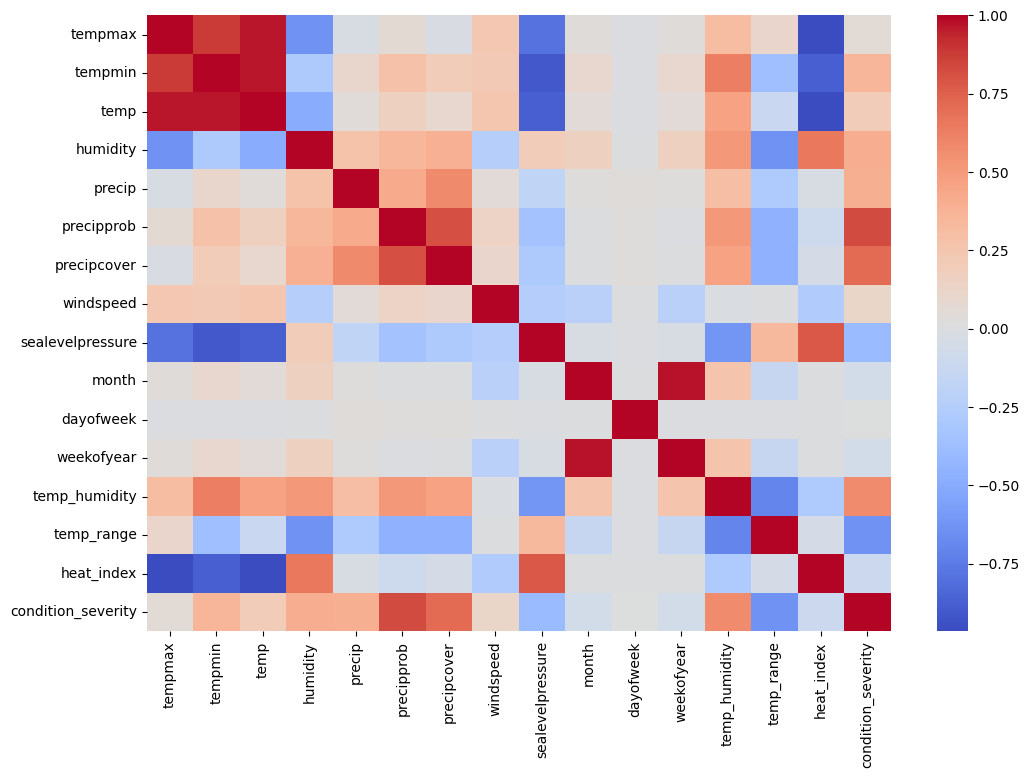

In [8]:
#Correlation HeatMap
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.show()
